In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import  collections


Using **left** parties dataset

In [2]:
nodes_df = pd.read_csv('subsets/NODES_sinistra_hate_subset.csv', low_memory=False)
edges_df = pd.read_csv('subsets/EDGES_sinistra_hate_subset.csv', low_memory=False)

Using **right** parties dataset

In [24]:
nodes_df = pd.read_csv('subsets/NODES_destra_hate_subset.csv', low_memory=False)
edges_df = pd.read_csv('subsets/EDGES_destra_hate_subset.csv', low_memory=False)

In [25]:
nodes_df

,id,label,counts_hate,counts_prob,counts_pos,polarity
0,0,diro,1,65,218,-0.467500
1,1,gente,15,99,232,0.484476
2,2,guerra,2,65,101,-0.409666
3,3,portato,3,12,11,-0.645658
4,4,casa,27,219,193,-0.547190
...,...,...,...,...,...,...
23856,23857,satanasso,0,0,0,-1.000000
23857,23858,pezzettino,0,0,0,-1.000000
23858,23859,tendopoli,0,0,0,0.000000
23859,23860,barbetta,0,0,0,0.000000


In [26]:
edges_df

,source,target,weight
0,0,2,12
1,0,3,6
2,0,4,29
3,0,5,2
4,0,93,2
...,...,...,...
1050061,23852,23855,1
1050062,23853,23854,1
1050063,23853,23855,1
1050064,23854,23855,1


**Creating NetworkX Graph object**

In [27]:
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])

In [28]:
data = nodes_df.set_index('id').to_dict('index').items()
data

dict_items([(0, {'label': 'diro', 'counts_hate': 1, 'counts_prob': 65, 'counts_pos': 218, 'polarity': -0.4675002450093739}), (1, {'label': 'gente', 'counts_hate': 15, 'counts_prob': 99, 'counts_pos': 232, 'polarity': 0.4844757663633736}), (2, {'label': 'guerra', 'counts_hate': 2, 'counts_prob': 65, 'counts_pos': 101, 'polarity': -0.4096655293982669}), (3, {'label': 'portato', 'counts_hate': 3, 'counts_prob': 12, 'counts_pos': 11, 'polarity': -0.6456578688683812}), (4, {'label': 'casa', 'counts_hate': 27, 'counts_prob': 219, 'counts_pos': 193, 'polarity': -0.5471903285814135}), (5, {'label': 'rimpatriare', 'counts_hate': 2, 'counts_prob': 18, 'counts_pos': 10, 'polarity': 0.8193310587965338}), (6, {'label': 'marcello', 'counts_hate': 0, 'counts_prob': 1, 'counts_pos': 117, 'polarity': -0.6456578688683812}), (7, {'label': 'perfavore', 'counts_hate': 0, 'counts_prob': 1, 'counts_pos': 1, 'polarity': 0.9092085160005584}), (8, {'label': 'patrio', 'counts_hate': 0, 'counts_prob': 25, 'counts

In [29]:
G.add_nodes_from(data)

Printing some Graph information

In [30]:
#Checking if the edges and nodes were added successfully
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 23862
Number of edges: 1050066
Average degree:  88.0116


###Some Network Statistics below can be done using Gephi while others are more flexible to try in Python

 ### **PART ONE:** Metrics Related to the network structure (Density, Transitivity)

**DENSITY**

In [31]:
#Overall Density of the network
density = nx.density(G)
print("Network density:", density)

Network density: 0.003688511232027897


This **Density** value just means that our network is weakly connected, this is predictable since we are dealing with a huge network.

## TAKES TOO MUCH, DO NOT RUN

**TRANSITIVITY**

In [ ]:
#Overall Density of the network
transitivity = nx.transitivity(G)
print("Network transitivity:", transitivity)

**Transitivity** is just a way to measure triadic closure, teh value we get tells us how the nodes are interconnected. This suggest that we should look more into the importance of each node(degrees, centrality, page rank etc..) using the metrics in PART 2. 

### **PART TWO:** Metrics Related to the importance of each node
In this section we add new attributes to each node depending on its centrality, degree...

**DEGREES** : Create **degrees dictionary**, mapping each word to their respective degrees. 

In [32]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
#It is important to set degree as an attribute of node alongside the other attributes 

In [33]:
#Sorting in desceding order (this will be important if we want to use nodes removal)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
labels_dict   = nx.get_node_attributes(G,'label')

In [34]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by degree:
(122, 5896) italia
(139, 5689) italiano
(64, 5471) fare
(202, 5339) anno
(80, 5149) sempre
(85, 4786) politico
(285, 4491) potere
(37, 4375) partire
(206, 4343) quando
(264, 4137) salvini
(621, 4067) lavorare
(47, 4050) dire
(233, 3993) persona
(72, 3889) governare
(171, 3801) paese
(104, 3800) parlare
(448, 3635) bene
(430, 3522) andare
(523, 3515) votare
(390, 3464) mettere


In [35]:
hate_index_dict = nx.get_node_attributes(G,'counts_hate')
sorted_hate_index = sorted(hate_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by hate_index:")
for d in sorted_hate_index[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by hate_index:
(122, 38) italia
(171, 30) paese
(4, 27) casa
(137, 25) merda
(195, 23) fuori
(59, 19) via
(238, 18) bastardo
(139, 16) italiano
(80, 16) sempre
(3098, 16) mare
(1, 15) gente
(15, 14) islamico
(448, 13) bene
(206, 13) quando
(378, 12) coglione
(430, 11) andare
(190, 11) delinquere
(285, 11) potere
(48, 11) dovere
(390, 11) mettere


In [46]:
hate_polar_dict = nx.get_node_attributes(G,'polarity')
sorted_hate_polar = sorted(hate_polar_dict.items(), key=itemgetter(1), reverse=False)
print("Top 20 nodes by polarity:")
for d in sorted_hate_polar[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by polarity:
(105, -1.0) terrorismo
(106, -1.0) matrice
(15, -1.0) islamico
(621, -1.0) lavorare
(631, -1.0) volontariato
(877, -1.0) lasciare
(35, -1.0) cittadino
(591, -1.0) migrare
(1042, -1.0) carne
(972, -1.0) straniero
(155, -1.0) castrare
(586, -1.0) citta
(1099, -1.0) risolvere
(1360, -1.0) paragonare
(479, -1.0) maria
(1478, -1.0) carbonaro
(1483, -1.0) contraddizione
(1491, -1.0) bosso
(1210, -1.0) rubare
(1493, -1.0) balletto


## Degree Distribution plots ( LOG SCALE) and fit for gamma

In [37]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35, normalized = False):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    
    keys   = np.asarray([*counter_dict.keys()])
    values = np.asarray([*counter_dict.values()])

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(keys,bins,weights=values)[0] / np.histogram(keys,bins)[0])
    bin_means_x = (np.histogram(keys,bins,weights=keys)[0] / np.histogram(keys,bins)[0])

    if (normalized == True):
        total = 0.
        for i in range(bin_count - 1):
            total += bin_means_y[i]*(bin_means_x[i])
        
        bin_means_y /= total
        
    return bin_means_x, bin_means_y

Creating histogram...


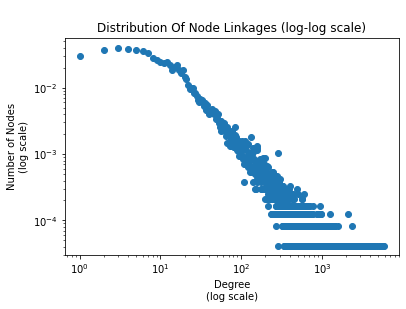

In [38]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'o')

## Fit and compute gamma

In [41]:
ba_c2 = dict(collections.Counter(degree_dict.values()))
ba_x,ba_y = log_binning(ba_c2, 20, True)

In [42]:
k_min = 1e1
number_nodes = len(nodes_df)

indexes_to_keep = [(ba_x >= k_min) & (ba_x <= 1.5e3)]
x = ba_x[tuple(indexes_to_keep)]
y = np.log10(ba_y[tuple(indexes_to_keep)])

gamma_param = np.polyfit(x, y, 1, full = True)
gamma =  gamma_param[0][1]


print("Gamma of the model is: ", gamma, "+-", gamma_param[3][1])
print("Natural cutoff is: ", k_min*(number_nodes**(1./(-gamma-1.)) ) )

Gamma of the model is:  -2.8154086311226303 +- 0.6018428051644809
Natural cutoff is:  2578.7352537158695


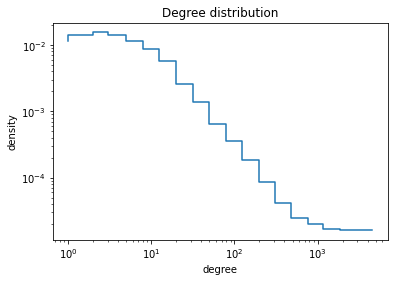

In [43]:
plt.step(ba_x, ba_y)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('density')
plt.yscale('log')
plt.title('Degree distribution')
plt.show()

## DO NOT RUN. IT TAKES TOO LONG

**Betweeness Centrality Dictionary**

It is quite informative to see what is the most central node in the network. This measure is more relevant because it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node.

In [ ]:
#Inspecting the centrality of each node --> important if we want to implement nodes removal
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Well, it is very expected that nodes with high degrees would have high centrality but it would be more interesting to see if there are any nodes with low degrees and high centrality. Below we append both attributes to investigate this hypothesis.

In [ ]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree,
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

**Pagerank score**

In [44]:
pagerank_dict = nx.pagerank(G, alpha=0.9)
nx.set_node_attributes(G, pagerank_dict, 'pagerank')

sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by pagerank:")
for b in sorted_pagerank[:20]:
    print(b, labels_dict.get(b[0]))

Top 20 nodes by pagerank:
(139, 0.006966143042332214) italiano
(122, 0.006902439028158913) italia
(202, 0.005471732848573498) anno
(64, 0.005390247324740067) fare
(80, 0.005181275890433188) sempre
(85, 0.005070583703576746) politico
(621, 0.004204502231666587) lavorare
(285, 0.004134133873767639) potere
(264, 0.003997069916459145) salvini
(72, 0.0037720380556621105) governare
(37, 0.0036301643122015) partire
(523, 0.0035934191485621665) votare
(206, 0.003548357930872871) quando
(233, 0.003435639205819573) persona
(171, 0.0031478975295790414) paese
(47, 0.0031458500142280375) dire
(104, 0.002972046826468901) parlare
(334, 0.002939146647314585) grande
(469, 0.0028317088667826006) legare
(57, 0.002690672539734886) leggere


In [45]:
#First get the top 20 nodes by betweenness as a list
top_pagerank = sorted_pagerank[:20]

#Then find and print their degree
for t_pr in top_pagerank: # Loop through top_betweenness
    degree = degree_dict[t_pr[0]] # Use degree_dict to access a node's degree,
#     betweenness_node = betweenness_dict[t_pr[0]]
    print("Name:", labels_dict.get(t_pr[0]), "| Pagerank:", t_pr[1], 
#           "| Betweenness Centrality:", betweenness_node, 
          "| Degree:", degree,  )

Name: italiano | Pagerank: 0.006966143042332214 | Degree: 5689
Name: italia | Pagerank: 0.006902439028158913 | Degree: 5896
Name: anno | Pagerank: 0.005471732848573498 | Degree: 5339
Name: fare | Pagerank: 0.005390247324740067 | Degree: 5471
Name: sempre | Pagerank: 0.005181275890433188 | Degree: 5149
Name: politico | Pagerank: 0.005070583703576746 | Degree: 4786
Name: lavorare | Pagerank: 0.004204502231666587 | Degree: 4067
Name: potere | Pagerank: 0.004134133873767639 | Degree: 4491
Name: salvini | Pagerank: 0.003997069916459145 | Degree: 4137
Name: governare | Pagerank: 0.0037720380556621105 | Degree: 3889
Name: partire | Pagerank: 0.0036301643122015 | Degree: 4375
Name: votare | Pagerank: 0.0035934191485621665 | Degree: 3515
Name: quando | Pagerank: 0.003548357930872871 | Degree: 4343
Name: persona | Pagerank: 0.003435639205819573 | Degree: 3993
Name: paese | Pagerank: 0.0031478975295790414 | Degree: 3801
Name: dire | Pagerank: 0.0031458500142280375 | Degree: 4050
Name: parlare | P

### PART 3: **Nodes Removal **
In this section we try to remove a set of nodes one by one to see how it affects the robustness of the network.

In [ ]:
#Here we select the nodes of hate comments subgraph and sort them by degree
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree_G= sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
selected_nodes = list(sorted_degree_G)[:10000] #20 nodes to be removed just for simplicity you can choose any number
#TOP 20 nodes to remove
nodes_removed = []
for i,v in enumerate(selected_nodes): 
    nodes_removed.append(selected_nodes[i][0])

In [ ]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
G1 = G.copy()
list_transitivity = [] #We can check density too
list_density = []
#diam_list =[]
nodes_rem = []
for i, node in enumerate(nodes_removed):
    G1.remove_node(node)
    list_density.append(nx.density(G1)) #returns an error 
    #list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
    nodes_rem.append(i+1)

In [ ]:
tryy = np.true_divide(1, list_transitivity)

In [ ]:
plt.plot(nodes_rem, list_transitivity, 'r-')
#plt.plot(nodes_removed, diam_list , 'b-')
plt.ylabel("transitivity")
plt.xlabel("Removed nodes")
plt.show()

In [ ]:
plt.plot(nodes_rem, list_density, 'r-')
#plt.plot(nodes_removed, diam_list , 'b-')
plt.ylabel("Density")
plt.xlabel("Removed nodes")
plt.show()